In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel('global-superstore.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [6]:
df.columns
#columns that can be used as target variable for linear regression=sales
#we need to predict sales using other variables

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [7]:
#drop irrelevant columns 
df.drop(columns=['Row ID','Order ID','Customer ID'], inplace = True)


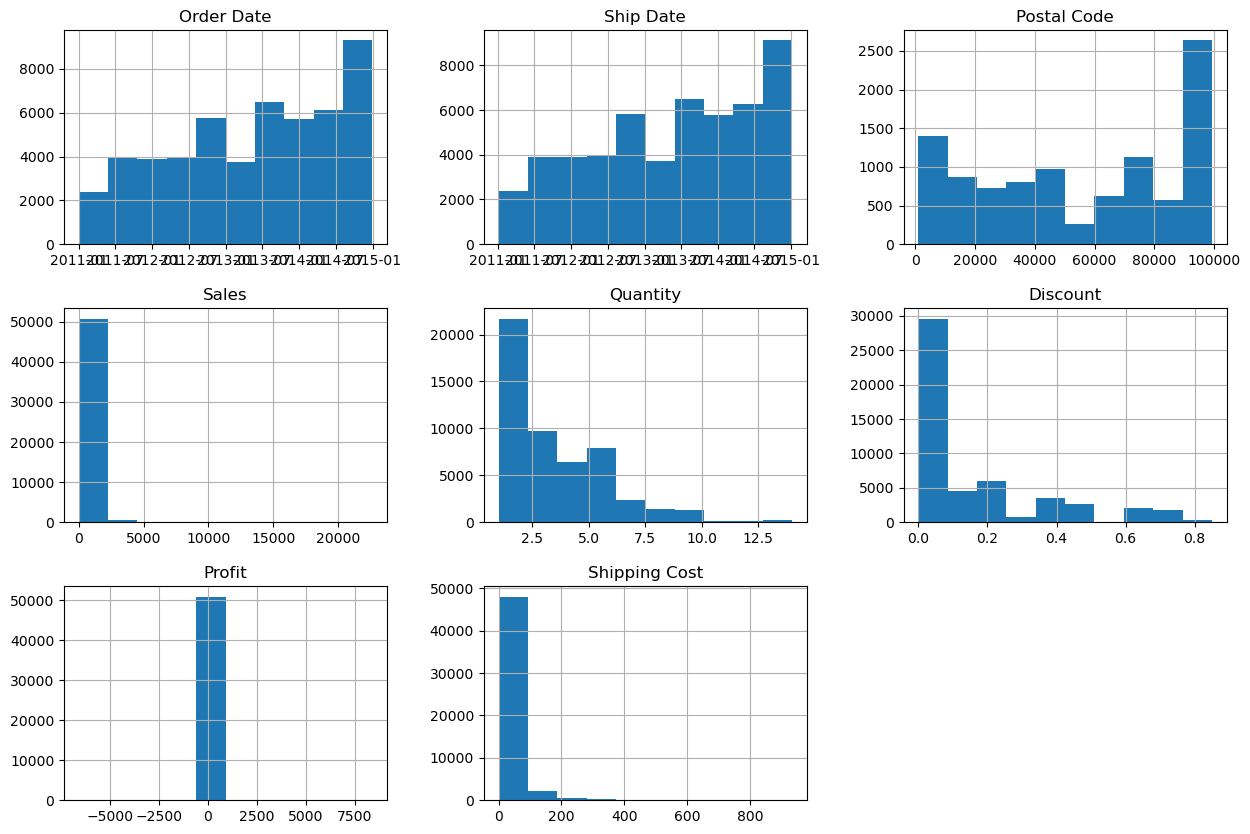

In [8]:
df.hist(figsize=(15,10))
plt.show()

In [9]:
#order increase per time
#outliers in sales,shipping,discount, sales
#split data into train and test

from sklearn.model_selection import train_test_split

In [10]:
df.shape

(51290, 21)

In [11]:
.1*51290 #number of rows to check generalization ability

5129.0

In [12]:
train,test=train_test_split(df,test_size=.1,random_state=5)

## seperation and preprocessing and for training and validation

In [13]:
train 

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Postal Code,Market,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
19288,2013-05-13,2013-05-18,Second Class,Meg Tillman,Consumer,Lagos,Lagos,Nigeria,NaN,Africa,...,FUR-SAF-10003469,Furniture,Bookcases,"Safco Classic Bookcase, Traditional",262.890,2,0.7,-385.590,13.280,Medium
46200,2013-11-13,2013-11-15,First Class,Anthony Witt,Consumer,Izmir,Izmir,Turkey,NaN,EMEA,...,OFF-STO-10004495,Office Supplies,Fasteners,"Stockwell Thumb Tacks, Bulk Pack",5.412,1,0.6,-3.948,1.030,Medium
43251,2014-12-15,2014-12-19,Standard Class,James Galang,Consumer,Ibadan,Oyo,Nigeria,NaN,Africa,...,FUR-DAN-10002967,Furniture,Bookcases,"Dania 3-Shelf Cabinet, Metal",42.273,1,0.7,-70.467,1.560,Medium
36331,2011-07-04,2011-07-06,First Class,Delfina Latchford,Consumer,La Romana,La Romana,Dominican Republic,NaN,LATAM,...,FUR-CH-10002882,Furniture,Chairs,"Harbour Creations Bag Chairs, Adjustable",102.576,3,0.2,26.916,3.197,High
7485,2011-12-07,2011-12-13,Standard Class,Patrick O'Donnell,Consumer,Chittagong,Chittagong,Bangladesh,NaN,APAC,...,FUR-BO-10002682,Furniture,Bookcases,"Safco Stackable Bookrack, Mobile",595.920,4,0.0,71.400,45.370,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520,2013-11-28,2013-12-05,Standard Class,Jennifer Patt,Corporate,Cancún,Quintana Roo,Mexico,NaN,LATAM,...,FUR-BO-10000636,Furniture,Bookcases,"Dania Floating Shelf Set, Metal",450.160,5,0.2,118.160,60.759,Low
35814,2013-04-25,2013-04-25,Same Day,Lela Donovan,Corporate,San Justo,Santa Fe,Argentina,NaN,LATAM,...,TEC-AC-10003548,Technology,Accessories,"Logitech Flash Drive, Bluetooth",24.408,2,0.4,-4.912,3.348,High
20463,2013-12-12,2013-12-19,Standard Class,Karen Carlisle,Corporate,Schiedam,South Holland,Netherlands,NaN,EU,...,TEC-MA-10004452,Technology,Machines,"Epson Receipt Printer, Durable",175.725,3,0.5,-151.155,12.020,Medium
18638,2014-08-13,2014-08-17,Standard Class,Julia Dunbar,Consumer,Johannesburg,Gauteng,South Africa,NaN,Africa,...,FUR-DAN-10001340,Furniture,Bookcases,"Dania Corner Shelving, Mobile",249.180,2,0.0,72.240,14.100,Medium


In [14]:
test

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Postal Code,Market,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
37638,2012-06-12,2012-06-16,Standard Class,Vivek Grady,Corporate,Baghdad,Baghdad,Iraq,NaN,EMEA,...,OFF-SAN-10002839,Office Supplies,Art,"Sanford Canvas, Fluorescent",103.56000,2,0.000,38.28000,2.830,Medium
8852,2012-04-18,2012-04-20,First Class,Nathan Cano,Consumer,Santa Maria,California,United States,93454.0,US,...,OFF-ST-10000532,Office Supplies,Storage,Advantus Rolling Drawer Organizers,115.44000,3,0.000,30.01440,37.950,High
18835,2014-12-12,2014-12-15,Second Class,Jason Gross,Corporate,Newcastle,New South Wales,Australia,NaN,APAC,...,FUR-FU-10004241,Furniture,Furnishings,"Deflect-O Light Bulb, Black",102.54600,6,0.100,12.36600,13.840,High
20230,2014-02-28,2014-03-04,Standard Class,Cathy Hwang,Home Office,Prague,Prague,Czech Republic,NaN,EMEA,...,OFF-ROG-10001340,Office Supplies,Storage,"Rogers File Cart, Industrial",141.60000,1,0.000,24.06000,12.260,Medium
24090,2013-06-28,2013-07-03,Standard Class,Julie Prescott,Home Office,San Pedro Sula,Cortés,Honduras,NaN,LATAM,...,FUR-CH-10003514,Furniture,Chairs,"Harbour Creations Rocking Chair, Set of Two",119.47200,2,0.400,-35.84800,8.836,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7259,2013-10-16,2013-10-21,Second Class,Harry Greene,Consumer,San Francisco de Macorís,Duarte,Dominican Republic,NaN,LATAM,...,TEC-CO-10001309,Technology,Copiers,"Hewlett Wireless Fax, Laser",809.04432,4,0.202,-174.39568,47.048,Medium
8577,2013-06-17,2013-06-21,Standard Class,Bryan Mills,Consumer,Vienna,Vienna,Austria,NaN,EU,...,OFF-ST-10002437,Office Supplies,Storage,"Eldon Trays, Blue",239.85000,5,0.000,43.05000,39.290,High
1749,2012-04-16,2012-04-20,Standard Class,Sarah Brown,Consumer,Evanston,Illinois,United States,60201.0,US,...,TEC-CO-10001766,Technology,Copiers,Canon PC940 Copier,1439.96800,4,0.200,485.98920,146.320,High
30114,2012-08-31,2012-09-05,Standard Class,Tom Ashbrook,Home Office,Bishkek,Bishkek,Kyrgyzstan,NaN,EMEA,...,OFF-ROG-10004949,Office Supplies,Storage,"Rogers Shelving, Industrial",62.61000,1,0.000,18.78000,5.450,Medium


### EDA

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46161 entries, 19288 to 35683
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Date      46161 non-null  datetime64[ns]
 1   Ship Date       46161 non-null  datetime64[ns]
 2   Ship Mode       46161 non-null  object        
 3   Customer Name   46161 non-null  object        
 4   Segment         46161 non-null  object        
 5   City            46161 non-null  object        
 6   State           46161 non-null  object        
 7   Country         46161 non-null  object        
 8   Postal Code     8966 non-null   float64       
 9   Market          46161 non-null  object        
 10  Region          46161 non-null  object        
 11  Product ID      46161 non-null  object        
 12  Category        46161 non-null  object        
 13  Sub-Category    46161 non-null  object        
 14  Product Name    46161 non-null  object        
 15  Sal

In [16]:
#order date to check no of orders over time
#add column month and day to df
#remebr to do same for test df
train['month']=train['Order Date'].dt.month #extract month
train['day']=train['Order Date'].dt.day  #extract days


In [17]:
train[['month','day']]

,month,day
19288,5,13
46200,11,13
43251,12,15
36331,7,4
7485,12,7
...,...,...
5520,11,28
35814,4,25
20463,12,12
18638,8,13


In [18]:
#group our values across each day and month to know the count of orders per month and day

month_counts=train.groupby('month').count()['Order Date']

In [19]:
month_counts

month
1     2332
2     1936
3     2759
4     2742
5     3357
6     4807
7     2852
8     4588
9     5368
10    4019
11    5743
12    5658
Name: Order Date, dtype: int64

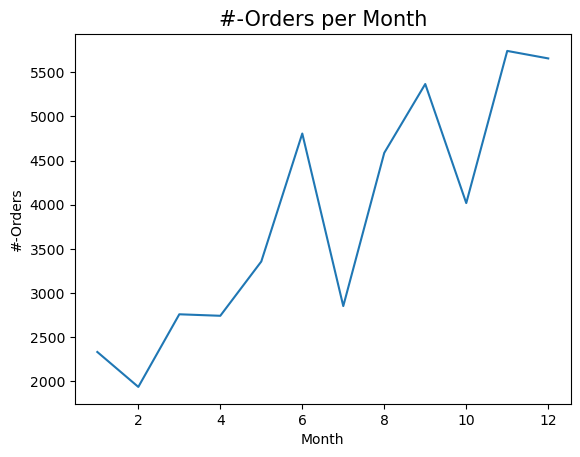

In [20]:
plt.plot(month_counts.index,month_counts.values)
plt.title('#-Orders per Month',fontsize=15)
plt.xlabel('Month')
plt.ylabel('#-Orders')
plt.show()

In [21]:
day_counts=train.groupby('day').count()['Order Date']

In [22]:
day_counts

day
1     1360
2     1454
3     1624
4     1515
5     1506
6     1501
7     1520
8     1406
9     1505
10    1503
11    1609
12    1584
13    1582
14    1472
15    1552
16    1398
17    1476
18    1664
19    1514
20    1588
21    1537
22    1466
23    1440
24    1528
25    1617
26    1606
27    1597
28    1530
29    1325
30    1294
31     888
Name: Order Date, dtype: int64

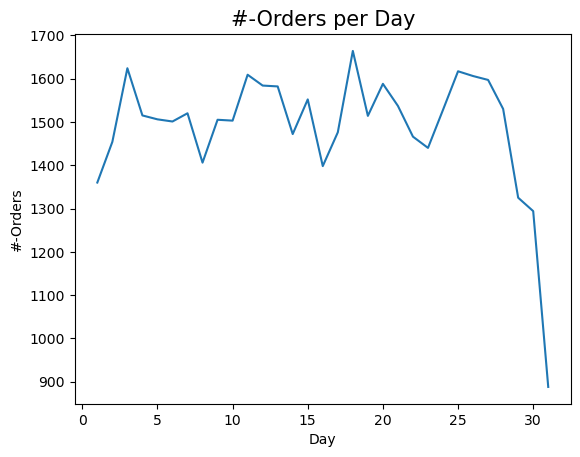

In [23]:
plt.plot(day_counts.index,day_counts.values)
plt.title('#-Orders per Day',fontsize=15)
plt.xlabel('Day')
plt.ylabel('#-Orders')
plt.show()

In [24]:
#not many months have 31 days reason for drop

train['year']=train['Order Date'].dt.year

In [25]:
year_counts=train.groupby('year').count()['Order Date'] #count of orders for each year

In [26]:
year_counts

year
2011     8059
2012     9916
2013    12445
2014    15741
Name: Order Date, dtype: int64

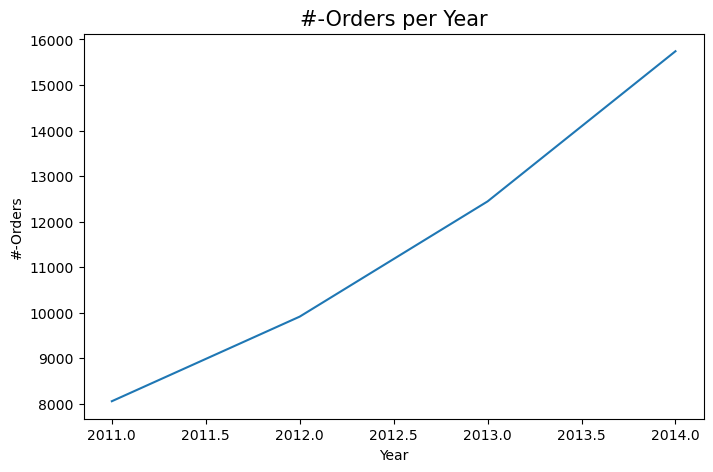

In [27]:
plt.figure(figsize=(8,5))
plt.plot(year_counts.index,year_counts.values)
plt.title('#-Orders per Year',fontsize=15)
plt.xlabel('Year')
plt.ylabel('#-Orders')
plt.show()

In [28]:
#country
#too many countries,so we'll check best performing countries

train.Country.value_counts().iloc[:20]

Country
United States         8966
Australia             2550
France                2528
Mexico                2358
Germany               1865
China                 1682
United Kingdom        1487
Brazil                1446
India                 1388
Turkey                1249
Indonesia             1242
Italy                  995
Nigeria                825
Spain                  783
Dominican Republic     667
Cuba                   660
El Salvador            653
Honduras               650
Philippines            602
New Zealand            564
Name: count, dtype: int64

Text(0.5, 1.0, 'The #-Order per Country')

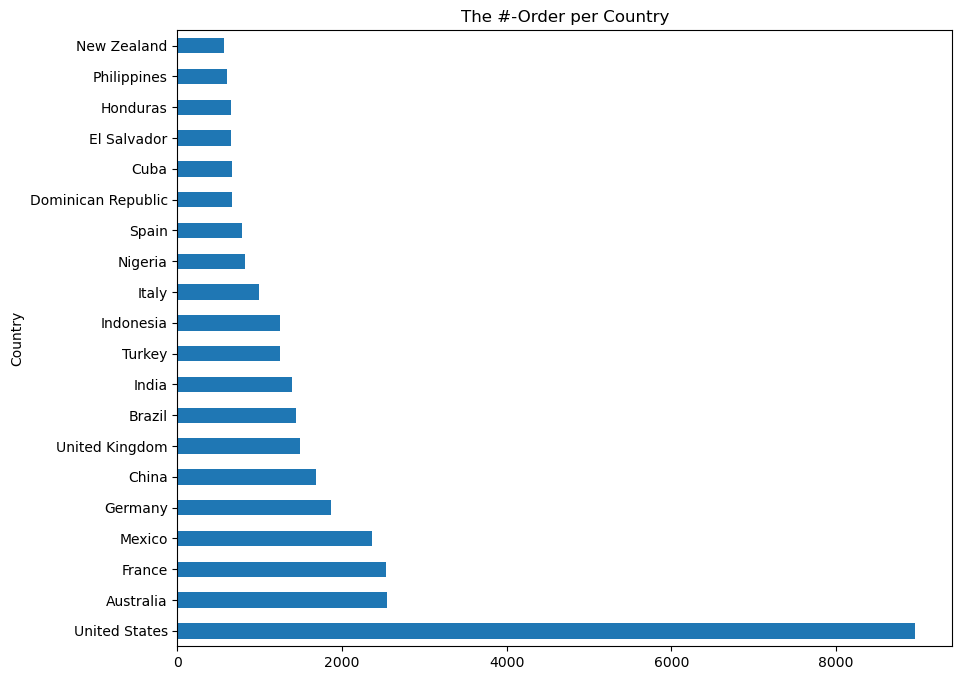

In [29]:
plt.figure(figsize=(10,8))
train.Country.value_counts().iloc[:20].plot(kind='barh')
plt.title('The #-Order per Country')

In [30]:
#categories: % of orders per category

train.Category

19288          Furniture
46200    Office Supplies
43251          Furniture
36331          Furniture
7485           Furniture
              ...       
5520           Furniture
35814         Technology
20463         Technology
18638          Furniture
35683          Furniture
Name: Category, Length: 46161, dtype: object

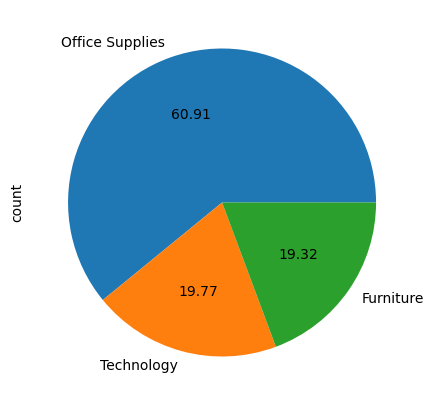

In [31]:
plt.figure(figsize=(8,5))
train.Category.value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

### Clean

In [32]:
train.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Postal Code', 'Market', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority',
       'month', 'day', 'year'],
      dtype='object')

In [33]:
#data preparing for modeling stage in ML
train.isna().sum()

Order Date            0
Ship Date             0
Ship Mode             0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       37195
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
month                 0
day                   0
year                  0
dtype: int64

In [34]:
train.drop(columns='Postal Code', inplace=True)

___deal with the categorical data 

In [35]:
train.duplicated().sum()

0

In [36]:
#deal with the categorical data

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46161 entries, 19288 to 35683
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Date      46161 non-null  datetime64[ns]
 1   Ship Date       46161 non-null  datetime64[ns]
 2   Ship Mode       46161 non-null  object        
 3   Customer Name   46161 non-null  object        
 4   Segment         46161 non-null  object        
 5   City            46161 non-null  object        
 6   State           46161 non-null  object        
 7   Country         46161 non-null  object        
 8   Market          46161 non-null  object        
 9   Region          46161 non-null  object        
 10  Product ID      46161 non-null  object        
 11  Category        46161 non-null  object        
 12  Sub-Category    46161 non-null  object        
 13  Product Name    46161 non-null  object        
 14  Sales           46161 non-null  float64       
 15  Qua

In [37]:
#extract the day, month,yera from the ship date col and creat new col for them
train['ship_month']=train['Ship Date'].dt.month
train['ship_day']=train['Ship Date'].dt.day
train['ship_year']=train['Ship Date'].dt.year

**categorical columns
fid alternative numerical col:lat and long for city, state,country

In [38]:
train.Segment.value_counts()

Segment
Consumer       23833
Corporate      13887
Home Office     8441
Name: count, dtype: int64

In [39]:
train.State.nunique()#too many rows so can not use it for one hot encoding

1087

In [40]:
train.Country.nunique()

147

In [41]:
#remove some categorical columns
train.drop(columns=['City','State','Country','Customer Name','Product ID','Product Name','Region','Order Date','Ship Date','Category'],inplace=True)

In [42]:
train['Sub-Category'].nunique()

17

In [43]:
train.tail()

,Ship Mode,Segment,Market,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,month,day,year,ship_month,ship_day,ship_year
5520,Standard Class,Corporate,LATAM,Bookcases,450.160,5,0.2,118.160,60.759,Low,11,28,2013,12,5,2013
35814,Same Day,Corporate,LATAM,Accessories,24.408,2,0.4,-4.912,3.348,High,4,25,2013,4,25,2013
20463,Standard Class,Corporate,EU,Machines,175.725,3,0.5,-151.155,12.020,Medium,12,12,2013,12,19,2013
18638,Standard Class,Consumer,Africa,Bookcases,249.180,2,0.0,72.240,14.100,Medium,8,13,2014,8,17,2014
35683,Standard Class,Consumer,LATAM,Chairs,78.120,2,0.0,35.920,3.382,Medium,9,27,2011,10,4,2011


In [44]:
#ordinal encoding for the order priority since the col is ordinal low,medium and high

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [45]:
Ordinal_encoder=LabelEncoder()

In [48]:
#fit_transform
train['Order Priority']=Ordinal_encoder.fit_transform(train['Order Priority'])

In [49]:
train['Order Priority']

19288    3
46200    3
43251    3
36331    1
7485     2
        ..
5520     2
35814    1
20463    3
18638    3
35683    3
Name: Order Priority, Length: 46161, dtype: int32

## use 4 one hot/label encoder to transform remaining categorical data to numerical data

1.ship mode

2.segment

3.market

4.sub-category
